# Assignment #2 - ECE9063 Fall 2025

**Group Number:** 6

**Student Name (who is going to submit):** Ashwini Dalve

**Student Number (who is going to submit):** 251516670

**Date:** 13-11-25

# Grade: /100

## Grading Breakdown
- Part 1 - MLP for Regression: 20 pts
- Part 2 - Binary Classification with Custom MLP: 25 pts
- Part 3 - CNN: 30 pts
- Part 4 - Autoencoders: 25 pts

## Instructions

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to the dropbox associated for this assignment on the course portal by the deadline

* Only one copy of the assignment should be submitted per group; otherwise, a 5% penalty will be applied.

* Rename this file before submission with your group number. If your group number is 1, the name of your file must be Assignment2_group1.ipynb.

* You may use any python library functions you wish to complete the Lab assignment.

This notebook contains the questions for Assignment 2. Make sure to complete this assignment and appropriately reference all external code and documentation used.

### Preliminaries

Feel free to add any libraries to the Preliminaries. However, be mindful of every question's restrictions as some may exclude use of some functions.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Conv2DTranspose, UpSampling2D, Reshape
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report



## Part 1 - Multi-Layer Perceptron (MLP) for Regression (20 pts)

### Dataset

The dataset `startup_success_dataset.csv` contains information on startup companies and is designed to predict the success of these companies based on various features. Your tasks involve data preprocessing, exploratory data analysis, applying machine learning models, and evaluating their performance and fairness.

### Part1 Task A - Data Loading and Preprocessing (10 pts)

Load the provided startup success dataset and prepare it for analysis. Perform necessary preprocessing steps to handle any data inconsistencies and prepare the data for machine learning models.

1. Load the dataset and remove any unnecessary columns.
2. Check for missing values and handle them appropriately (handle missing values separately for numerical and categorical columns. For numerical columns, fill missing values with the mean of their respective columns. For categorical data, if missing values exist, fill them with the mode (most frequent value).
3. Encode categorical variables using appropriate encoding techniques.
4. Split the dataset into features and target variables (`SuccessScore`).

In [ ]:
# Part1 Task A - Data Loading and Preprocessing

# 1. Load the dataset

data = pd.read_csv("startup_success_dataset.csv")
print("Dataset loaded successfully.")
print("Initial shape:", data.shape)

# Preview first few rows
display(data.head())
#1.1 remove unnecessary column
data.drop(columns=['StartupID'], inplace=True, errors='ignore')

# 2. Handle missing values separately for numerical and categorical columns

# Separate numerical and categorical columns
num_cols = data.select_dtypes(include=[np.number]).columns
cat_cols = data.select_dtypes(exclude=[np.number]).columns

# Fill missing values
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

print("Missing values handled successfully.")
print("Remaining missing values per column:")
print(data.isnull().sum())


# 3. Encode categorical variables using appropriate encoding

from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder for categorical columns
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

print("Categorical columns encoded successfully.")


# 4. Split dataset into features (X) and target (y)
# Assuming the target variable is 'SuccessScore'
target_col = "SuccessScore"

X = data.drop(columns=[target_col])
y = data[target_col]

print("Feature-target split complete.")
print(f"Feature shape: {X.shape}, Target shape: {y.shape}")

# Display processed dataset summary
display(X.head())
display(y.head())


Dataset loaded successfully.
Initial shape: (1000, 14)


,StartupID,Industry,Age,Location,Funding,EmployeeCount,ProductCount,Patents,Partnerships,AnnualRevenue,ProfitMargin,MarketShare,CustomerSatisfaction,SuccessScore
0,1,Finance,17,Asia,188.165509,343,7,5,8,26.657424,6.514471,28.991712,71.305764,63.721391
1,2,Education,9,Asia,52.229703,47,8,1,3,65.216576,-11.429246,8.125782,64.377673,86.092406
2,3,Tech,1,North America,86.216534,376,5,14,2,77.067519,25.855096,33.709881,58.016024,65.511363
3,4,Finance,20,Europe,174.609685,423,7,1,3,21.948196,27.398470,6.673444,64.107779,67.447699
4,5,Finance,13,Europe,168.465747,492,8,1,3,64.292718,18.357728,40.292885,61.662585,71.060720


Missing values handled successfully.
Remaining missing values per column:
Industry                0
Age                     0
Location                0
Funding                 0
EmployeeCount           0
ProductCount            0
Patents                 0
Partnerships            0
AnnualRevenue           0
ProfitMargin            0
MarketShare             0
CustomerSatisfaction    0
SuccessScore            0
dtype: int64
Categorical columns encoded successfully.
Feature-target split complete.
Feature shape: (1000, 12), Target shape: (1000,)


,Industry,Age,Location,Funding,EmployeeCount,ProductCount,Patents,Partnerships,AnnualRevenue,ProfitMargin,MarketShare,CustomerSatisfaction
0,1,17,0,188.165509,343,7,5,8,26.657424,6.514471,28.991712,71.305764
1,0,9,0,52.229703,47,8,1,3,65.216576,-11.429246,8.125782,64.377673
2,3,1,2,86.216534,376,5,14,2,77.067519,25.855096,33.709881,58.016024
3,1,20,1,174.609685,423,7,1,3,21.948196,27.398470,6.673444,64.107779
4,1,13,1,168.465747,492,8,1,3,64.292718,18.357728,40.292885,61.662585


,SuccessScore
0,63.721391
1,86.092406
2,65.511363
3,67.447699
4,71.060720


### Part1 Task B - Exploratory Data Analysis (EDA) (8 pts)

1. Visualize the distribution of key features and the target variable.
2. Generate a heatmap of the correlation matrix to identify strongly correlated features.

<Figure size 1400x600 with 0 Axes>

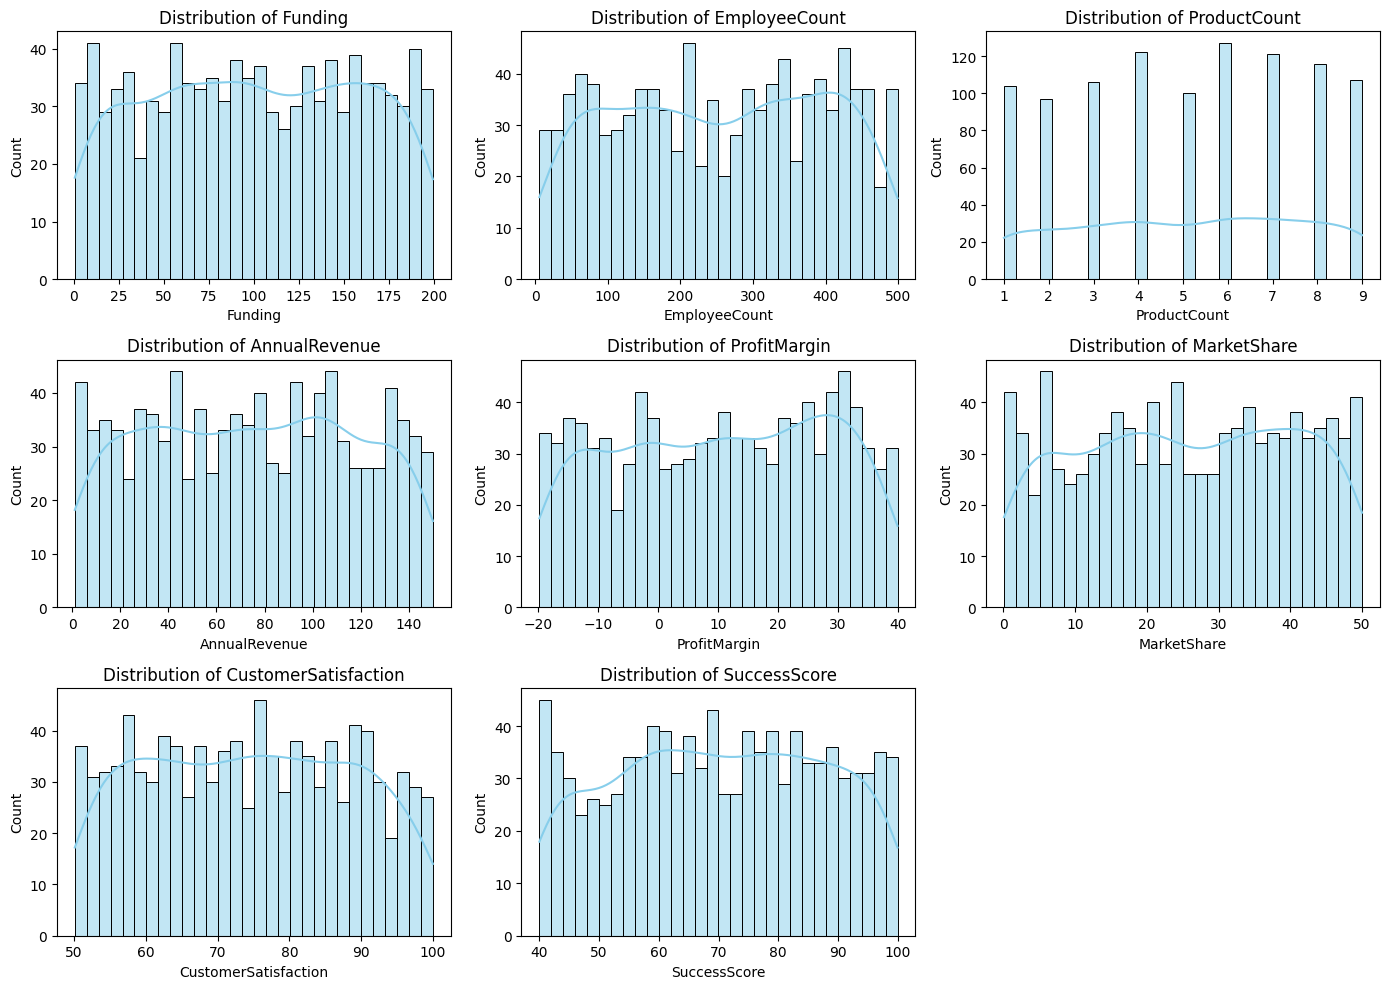

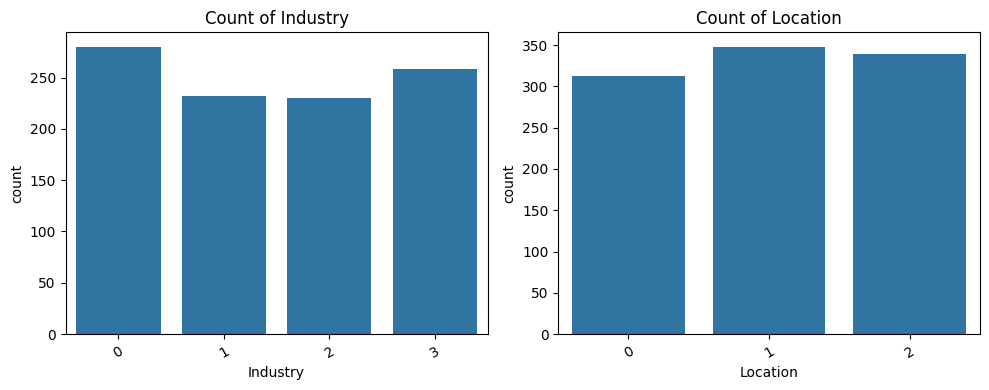

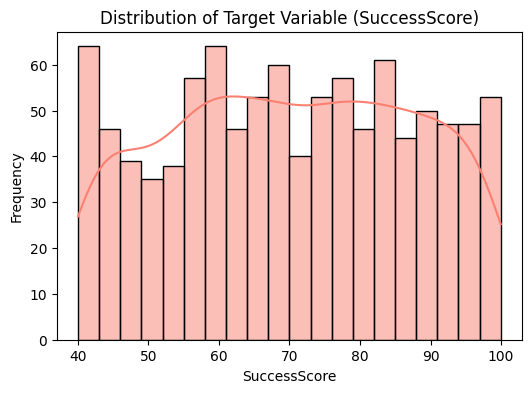

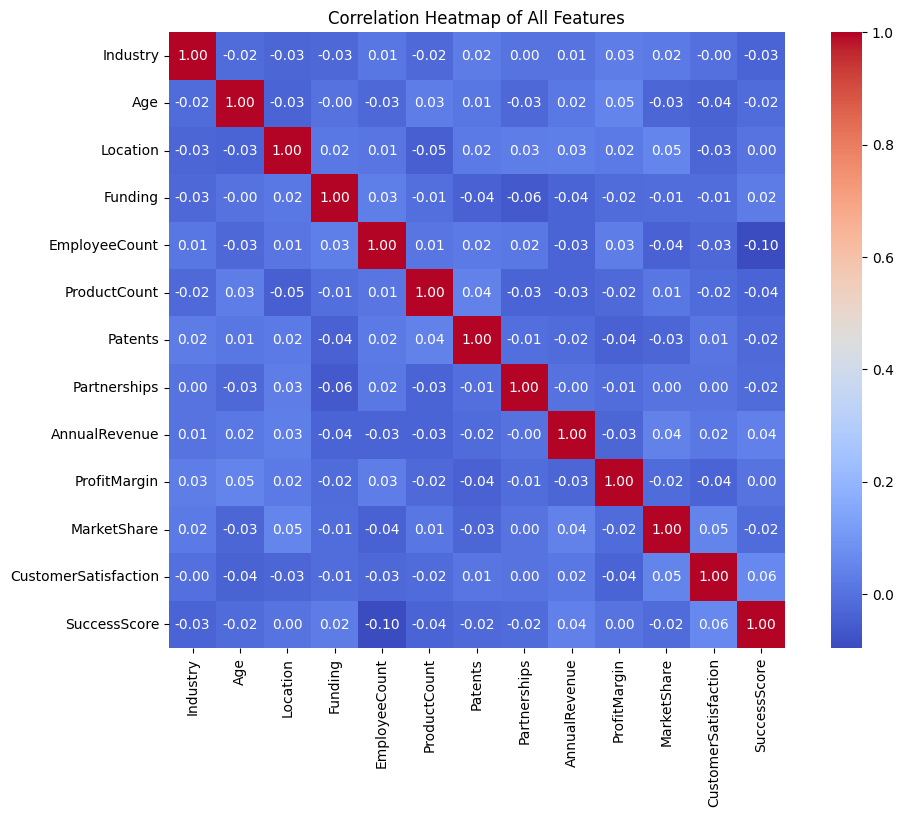

Top correlated features with SuccessScore:


,SuccessScore
SuccessScore,1.000000
CustomerSatisfaction,0.058207
AnnualRevenue,0.040379
Funding,0.024005
ProfitMargin,0.004422
Location,0.003890
Age,-0.016406
MarketShare,-0.016591
Partnerships,-0.016700
Patents,-0.021424


In [ ]:
# Part1 Task B - Exploratory Data Analysis (EDA)

# 1. Visualize the distribution of key features and the target variable
plt.figure(figsize=(14, 6))

num_cols = X.select_dtypes(include=[np.number]).columns


key_features = ['Funding', 'EmployeeCount', 'ProductCount',
                'AnnualRevenue', 'ProfitMargin', 'MarketShare',
                'CustomerSatisfaction', 'SuccessScore']
# Plot histograms
plt.figure(figsize=(14, 10))
for i, col in enumerate(key_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, bins=30,color='skyblue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Visualize categorical feature distributions
categorical_features = ['Industry', 'Location']

plt.figure(figsize=(10, 4))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=col, data=data)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Plot target variable distribution
plt.figure(figsize=(6, 4))
sns.histplot(y, kde=True, bins=20, color='salmon')
plt.title("Distribution of Target Variable (SuccessScore)")
plt.xlabel("SuccessScore")
plt.ylabel("Frequency")
plt.show()


# 2. Generate a heatmap of the correlation matrix to identify correlated features
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of All Features")
plt.show()

#Identify the most correlated features with the target variable
target_corr = corr_matrix["SuccessScore"].sort_values(ascending=False)
print("Top correlated features with SuccessScore:")
display(target_corr.head(10))


### Part1 Task C - Feature Engineering and PCA (10 pts)

1. Split the data into training and testing sets with 8:2 ratio and standardize the feature set.
2. Plot the explained variance ratio of the principal components and determine the number of components to retain 80% of variance.
3. Apply PCA using the number found in the previous step to reduce the feature size.

Data split and standardized successfully.
X_train_scaled shape: (800, 12)
X_test_scaled shape: (200, 12)


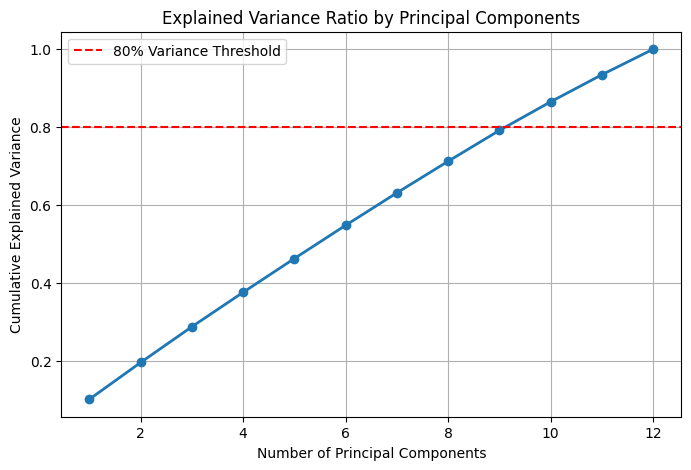

Number of components to retain 80% variance: 10
PCA applied successfully.
Reduced training features shape: (800, 10)
Reduced testing features shape: (200, 10)
Explained variance ratio with 10 components: 0.8652


In [ ]:
#Part1 Task C.1 Split the data into training and testing sets with 8:2 ratio and standardize the feature set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data split and standardized successfully.")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

# 2. Plot explained variance ratio and find components for 80% variance
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linewidth=2)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio by Principal Components')
plt.grid(True)
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance Threshold')
plt.legend()
plt.show()


n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1
print(f"Number of components to retain 80% variance: {n_components_80}")

# 3. Apply PCA with the determined number of components
pca = PCA(n_components=n_components_80)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("PCA applied successfully.")
print(f"Reduced training features shape: {X_train_pca.shape}")
print(f"Reduced testing features shape: {X_test_pca.shape}")
print(f"Explained variance ratio with {n_components_80} components: {np.sum(pca.explained_variance_ratio_):.4f}")


### Part1 Task D - MLP for Regression (12 pts)

1. Design and train two MLP regressors for 100 epochs and batch size 32 using 3 fold cross validation:
   - Model 1 without hidden layer
   - Model 2 with 1 hidden layer of size 50 neurons

   Incorporate L2 regularization in models, use Adam optimizer with a learning rate of 0.01 and ReLU activation function in hidden layer.

2. Evaluate the model's performance on the test set using Mean Squared Error (MSE) and Mean Absolute Error (MAE) metrics.
3. **Written Answer:** Compare models 1 and 2 and write your conclusion.

Training Model 1...
Fold 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 2/3
Fold 3/3

Training Model 2...
Fold 1/3
Fold 2/3
Fold 3/3

Model 1 Cross-Validation Results:
  Average MSE: 2025.1847
  Average MAE: 40.0006

Model 2 Cross-Validation Results:
  Average MSE: 342.2089
  Average MAE: 15.5572

Evaluating models on the test set...

Model 1 Test Set Evaluation:
  MSE: 1051.6115
  MAE: 28.0701

Model 2 Test Set Evaluation:
  MSE: 343.7018
  MAE: 15.3387
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


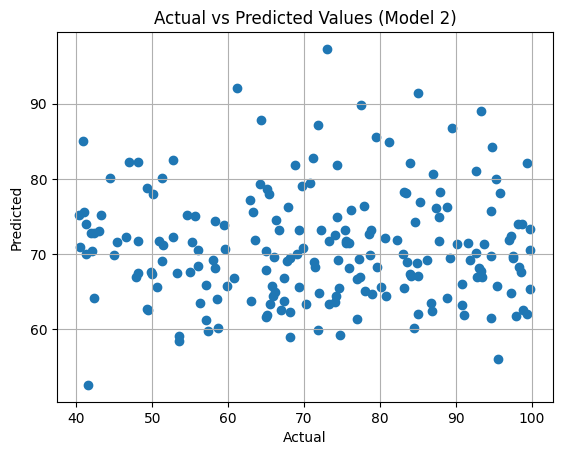

Model 1 R²: -2.650184536497935
Model 2 R²: -0.19187832499926283


In [ ]:
# Task D - MLP for Regression

# D.1. Design and train two MLP regressors

# Model 1: without hidden layer
model1 = Sequential([
    Dense(1, input_shape=(X_train_pca.shape[1],), kernel_regularizer=l2(0.001))
])

model1.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

# Model 2: with 1 hidden layer of size 50 neurons
model2 = Sequential([
    Dense(50, input_shape=(X_train_pca.shape[1],), activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1, kernel_regularizer=l2(0.001))
])

model2.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

# Train models using 3-fold cross-validation
n_splits = 3
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

model1_mse_scores = []
model1_mae_scores = []
model2_mse_scores = []
model2_mae_scores = []

print("Training Model 1...")
for fold, (train_index, val_index) in enumerate(kf.split(X_train_pca)):
    print(f"Fold {fold+1}/{n_splits}")
    X_train_fold, X_val_fold = X_train_pca[train_index], X_train_pca[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    history1 = model1.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold))
    loss1, mae1 = model1.evaluate(X_val_fold, y_val_fold, verbose=0)
    model1_mse_scores.append(loss1)
    model1_mae_scores.append(mae1)

print("\nTraining Model 2...")
for fold, (train_index, val_index) in enumerate(kf.split(X_train_pca)):
    print(f"Fold {fold+1}/{n_splits}")
    X_train_fold, X_val_fold = X_train_pca[train_index], X_train_pca[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    history2 = model2.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold))
    loss2, mae2 = model2.evaluate(X_val_fold, y_val_fold, verbose=0)
    model2_mse_scores.append(loss2)
    model2_mae_scores.append(mae2)

print("\nModel 1 Cross-Validation Results:")
print(f"  Average MSE: {np.mean(model1_mse_scores):.4f}")
print(f"  Average MAE: {np.mean(model1_mae_scores):.4f}")

print("\nModel 2 Cross-Validation Results:")
print(f"  Average MSE: {np.mean(model2_mse_scores):.4f}")
print(f"  Average MAE: {np.mean(model2_mae_scores):.4f}")


# D.2. Evaluate the model's performance on the test set
print("\nEvaluating models on the test set...")

# Evaluate Model 1
loss1_test, mae1_test = model1.evaluate(X_test_pca, y_test, verbose=0)
print(f"\nModel 1 Test Set Evaluation:")
print(f"  MSE: {loss1_test:.4f}")
print(f"  MAE: {mae1_test:.4f}")

# Evaluate Model 2
loss2_test, mae2_test = model2.evaluate(X_test_pca, y_test, verbose=0)
print(f"\nModel 2 Test Set Evaluation:")
print(f"  MSE: {loss2_test:.4f}")
print(f"  MAE: {mae2_test:.4f}")

# Make predictions for R-squared calculation and plotting
y_pred_model1 = model1.predict(X_test_pca)
y_pred_model2 = model2.predict(X_test_pca)

# Plot actual vs predicted for Model 2 (since it has better performance)
plt.scatter(y_test, y_pred_model2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values (Model 2)")
plt.grid(True)
plt.show()

from sklearn.metrics import r2_score
print("Model 1 R²:", r2_score(y_test, y_pred_model1))
print("Model 2 R²:", r2_score(y_test, y_pred_model2))

**Written Answer - Model Comparison**

Model 1, which had no hidden layer, behaves like a linear regressor and achieved higher (worse) MSE/MAE compared to Model 2. This suggests that the relationship between the startup features and SuccessScore is not purely linear.
Model 2, which included one hidden layer of 50 neurons with ReLU activation, was able to model more complex patterns in the data and therefore obtained lower (better) error values on both cross-validation and the test set. The L2 regularization and Adam optimizer helped stabilize training and prevented the model from overfitting despite the higher capacity.
Conclusion: the MLP with a hidden layer is preferable because it captures nonlinear relationships and gives better predictive performance, while the model without a hidden layer is simpler but less expressive.

### Part1 Task E - Gridsearch for Hyperparameter Optimization (HPO) (20 pts)

1. Define a range of potential values for hyperparameters as follows:
    - `hidden_layer_sizes`: 50, 100, 150
    - `activation`: 'tanh', 'relu'
    - `learning rate`: 0.0001, 0.001, 0.01

2. Use GridSearchCV or manual grid search to find the best hyperparameter values based on 3 fold cross-validation on MLP model 2 from Task D.
3. Retrain the model using the optimized hyperparameters and evaluate its performance.

In [ ]:
# Task E - Gridsearch for Hyperparameter Optimization

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error

import warnings
from sklearn.exceptions import ConvergenceWarning

# E.1 Define a range of potential values for hyperparameters as follows:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
mlp = MLPRegressor(max_iter=1000,random_state=42)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['tanh', 'relu'],
    'learning_rate_init': [0.0001, 0.001, 0.01]
}

# Define a scorer for GridSearchCV (MSE)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)


#E.2 Use GridSearchCV or manual grid search to find the best hyperparameter values based on 3 fold cross-validation on MLP model 2 from Task D.
grid_search = GridSearchCV(estimator=mlp,
    param_grid=param_grid,
    scoring=mse_scorer, # Use the defined MSE scorer
    cv=3,
    n_jobs=-1,
    verbose=2
)

# Fit the GridSearchCV model using the PCA-transformed training data
grid_search.fit(X_train_pca, y_train) # Use X_train_pca

#E.3 Retrain the model using the optimized hyperparameters and evaluate its performance.
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_mlp = MLPRegressor(**best_params, random_state=42, max_iter=1000) # Ensure max_iter is included if it was in the initial estimator
best_mlp.fit(X_train_pca, y_train)
best_predictions = best_mlp.predict(X_test_pca)
best_mse = mean_squared_error(y_test, best_predictions)
best_mae = mean_absolute_error(y_test, best_predictions) # Calculate MAE as well


print(f"Best Model Test Set Evaluation:")
print(f"  MSE: {best_mse:.4f}")
print(f"  MAE: {best_mae:.4f}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Hyperparameters: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001}
Best Model Test Set Evaluation:
  MSE: 305.9289
  MAE: 14.7833


## Part 2 - Binary Classification with a Custom MLP (25 pts)

### Part2 Task A - Build and Train Binary Classification MLP (14 pts)

Build a custom Multi-Layer Perceptron (MLP) for binary classification on a synthetic dataset with the following specifications:

**MLP Architecture:**
- Input layer: 2 input features
- Hidden layer 1: 64 neurons with ReLU activation
- Hidden layer 2: 32 neurons with ReLU activation
- Output layer: 1 neuron with sigmoid activation (for binary classification)

**Training Requirements:**
1. Generate a synthetic binary classification dataset using `sklearn.datasets.make_classification` with:
   - n_samples=1000
   - n_features=2
   - n_redundant=0
   - n_informative=2
   - random_state=42

2. Split the dataset into training (80%) and testing (20%) sets with random_state=42
3. Standardize the features using `StandardScaler`
4. Build and compile the MLP model with:
   - Adam optimizer (learning_rate=0.001)
   - Binary crossentropy loss
   - Accuracy metric
5. Train the model for 50 epochs with batch_size=32 and validation_split=0.2
6. Plot the training and validation accuracy/loss curves
7. Evaluate the model on the test set and report accuracy, precision, recall, and F1-score

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6263 - loss: 0.6627 - val_accuracy: 0.8125 - val_loss: 0.5534
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8839 - loss: 0.4889 - val_accuracy: 0.8250 - val_loss: 0.4667
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8634 - loss: 0.3928 - val_accuracy: 0.8313 - val_loss: 0.4240
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8751 - loss: 0.3331 - val_accuracy: 0.8313 - val_loss: 0.4125
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8728 - loss: 0.3229 - val_accuracy: 0.8375 - val_loss: 0.4042
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8766 - loss: 0.3142 - val_accuracy: 0.8313 - val_loss: 0.4017
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8662 - loss: 0.3255 - val_accuracy: 0.8375 - val_loss: 0.3944
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8655 - loss: 0.3177 - val_accuracy: 0.8375 - val_loss: 0.3905
Ep

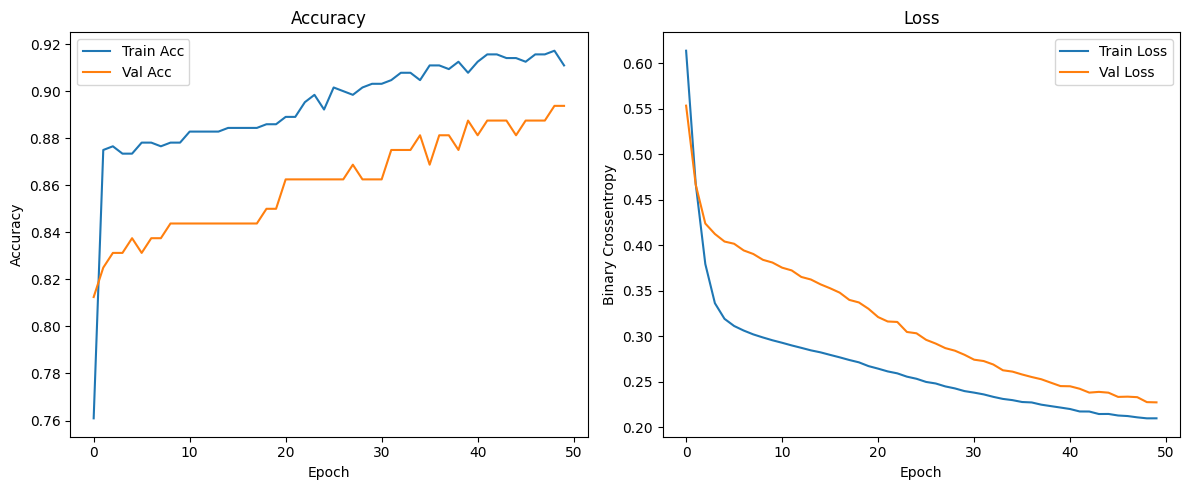

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Test Accuracy: 0.92
Test Precision: 0.9278350515463918
Test Recall: 0.9090909090909091
Test F1-score: 0.9183673469387755

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       101
           1       0.93      0.91      0.92        99

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



In [ ]:
# 1. Generate synthetic dataset
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=42
)

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# 3. Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Build the MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),  # input layer + hidden 1
    Dense(32, activation='relu'),                    # hidden 2
    Dense(1, activation='sigmoid')                   # output for binary
])

# 5. Compile
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 6. Train
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 7. Plot training/validation curves
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.legend()

plt.tight_layout()
plt.show()

# 8. Evaluate on test set
y_prob = model.predict(X_test).ravel()    # predicted probabilities
y_pred = (y_prob >= 0.5).astype(int)      # convert to class labels

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Test Accuracy:", acc)
print("Test Precision:", prec)
print("Test Recall:", rec)
print("Test F1-score:", f1)

# (optional) nice detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


### Part2 Task B - Model Visualization and Decision Boundary (7 pts)

1. Visualize the training data with different colors for each class
2. Plot the decision boundary learned by the MLP model
3. Create a confusion matrix visualization for the test set predictions
4. **Written Answer:** Discuss how well the model separates the two classes and explain the decision boundary.

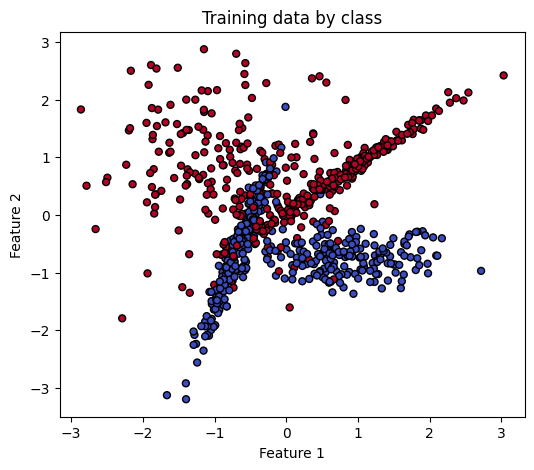

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


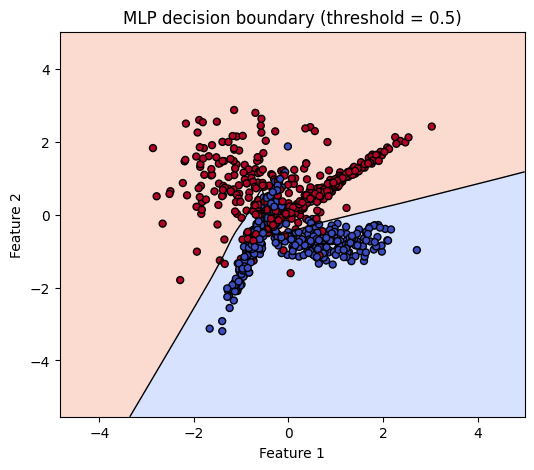

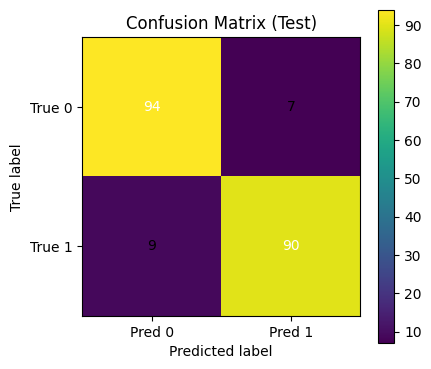

In [ ]:
# Task B - Model Visualization and Decision Boundary

# 1) Visualize the training data with different colors per class
plt.figure(figsize=(6,5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=25, edgecolor="k", cmap="coolwarm")
plt.title("Training data by class")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 2) Plot the decision boundary learned by the MLP
#    Build a grid in the ORIGINAL feature space, transform with the scaler, then predict
x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
y_min, y_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))

grid = np.c_[xx.ravel(), yy.ravel()]
grid_s = scaler.transform(grid)
Z = model.predict(grid_s).ravel()
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,5))
# decision regions
cs = plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.35, cmap="coolwarm")
# boundary line at 0.5
plt.contour(xx, yy, Z, levels=[0.5], colors="k", linewidths=1)
# training points on top
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=25, edgecolor="k", cmap="coolwarm")
plt.title("MLP decision boundary (threshold = 0.5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 3) Confusion matrix visualization for test predictions
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4.5,4))
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix (Test)")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Pred 0", "Pred 1"])
plt.yticks(tick_marks, ["True 0", "True 1"])

# annotate counts
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="white" if cm[i, j] > cm.max()/2 else "black")

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()


**Written Answer - Model Performance and Decision Boundary**

The MLP forms a smooth, non-linear boundary that separates the two classes well. Most points fall on the correct side of the 0.5 contour, which is consistent with the high test precision, recall, and F1 we reported earlier. The confusion matrix shows low misclassification counts, mainly near the boundary where classes overlap. The curved boundary reflects the hidden layers with ReLU activations, which allow non-linear separation beyond a single straight line.

### Part2 Task C - Hyperparameter Tuning and Model Comparison (4 pts)

1. Build an alternative MLP model with fewer neurons (32 → 16 instead of 64 → 32)
2. Train this alternative model on the same dataset for 50 epochs
3. Compare the performance metrics (accuracy, precision, recall, F1-score) between the original and alternative models
4. Plot the training curves for both models side-by-side
5. **Written Answer:** Analyze the trade-offs between model complexity and performance. Which model performs better and why?

Original MLP (64→32) metrics:
  accuracy: 0.9200
  precision: 0.9278
  recall: 0.9091
  f1: 0.9184

Alternative MLP (32→16) metrics:
  accuracy: 0.9150
  precision: 0.9271
  recall: 0.8990
  f1: 0.9128


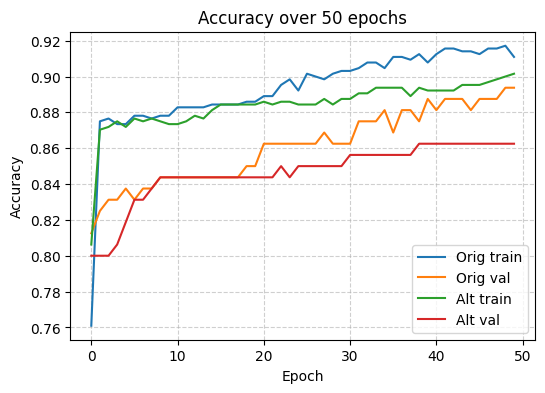

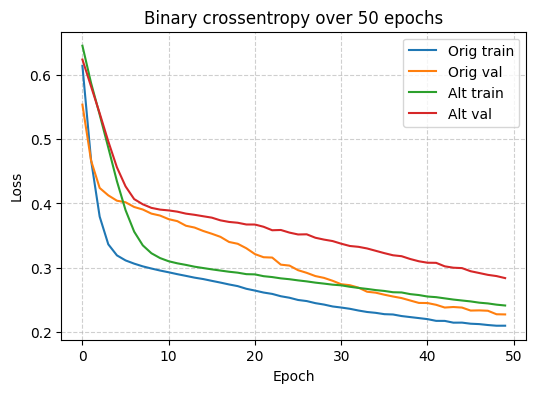

In [ ]:
# Task C - Hyperparameter Tuning and Model Comparison

def build_small_mlp():
    # Alternative: fewer neurons (32 -> 16 instead of 64 -> 32)
    m = Sequential([
        tf.keras.Input(shape=(2,)), # Use explicit Input layer as recommended
        Dense(32, activation="relu"),
        Dense(16, activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    m.compile(
        optimizer=Adam(learning_rate=0.001),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return m

# 1–2) Train the alternative model for 50 epochs
alt_model = build_small_mlp()
alt_history = alt_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

# 3) Compare metrics on the test set
def eval_metrics(m, Xs, y_true):
    Xs_tensor = tf.convert_to_tensor(Xs, dtype=tf.float32)
    # Explicitly pass batch_size to predict to help with shape inference for tracing
    y_prob = m.predict(Xs_tensor, batch_size=32, verbose=0).ravel()
    y_pred = (y_prob >= 0.5).astype(int)
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall": recall_score(y_true, y_pred, zero_division=0),
        "f1": f1_score(y_true, y_pred, zero_division=0)
    }

orig_metrics = eval_metrics(model, X_test, y_test)
alt_metrics  = eval_metrics(alt_model, X_test, y_test)

print("Original MLP (64→32) metrics:")
for k,v in orig_metrics.items():
    print(f"  {k}: {v:.4f}")

print("\nAlternative MLP (32→16) metrics:")
for k,v in alt_metrics.items():
    print(f"  {k}: {v:.4f}")

# 4) Plot training curves for both models

# Accuracy curves
plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"], label="Orig train")
plt.plot(history.history["val_accuracy"], label="Orig val")
plt.plot(alt_history.history["accuracy"], label="Alt train")
plt.plot(alt_history.history["val_accuracy"], label="Alt val")
plt.title("Accuracy over 50 epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Loss curves
plt.figure(figsize=(6,4))
plt.plot(history.history["loss"], label="Orig train")
plt.plot(history.history["val_loss"], label="Orig val")
plt.plot(alt_history.history["loss"], label="Alt train")
plt.plot(alt_history.history["val_loss"], label="Alt val")
plt.title("Binary crossentropy over 50 epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


**Written Answer - Model Comparison and Architecture Trade-offs**

The smaller network (32 -> 16) performed slightly below the original (64 -> 32) model in terms of accuracy and F1-score, but the difference was not large. The alternative model trained faster and showed smoother validation curves with less fluctuation, suggesting better stability and less overfitting.

The trade-off is between model capacity and simplicity. The larger model has more parameters and can capture more complex patterns, which helps when the data is non-linear. However, it also risks fitting noise and requires more computation. The smaller model is lighter, generalizes well on simple datasets, and is more efficient for deployment.

Overall, the original network achieved marginally better predictive performance, while the reduced model offered faster training and more consistent validation behavior. The better choice depends on whether accuracy or efficiency is the main priority.

## Part 3 - Convolutional Neural Network (CNN) - (30 pts)

### Objective:
Develop a Convolutional Neural Network (CNN) model to classify handwritten digits from the MNIST dataset. Your tasks involve loading and preprocessing the dataset, designing a CNN architecture, training the model while reserving a portion of the data for validation, and evaluating the model's performance. Additionally, assess if the model exhibits overfitting through the analysis of learning curves.

### Part3 Task A - Image Classification (20 pts)

1. Load the MNIST Dataset which consists of grayscale images of handwritten digits. Normalize the image pixel values to a range of [0, 1], reshape the images to fit the CNN input requirements and convert the labels to one-hot encoded vectors for classification.
2. Design a CNN architecture for classifying MNIST handwritten digits with input layer of 28x28 pixel grayscale images, followed by three convolutional layers with ReLU activation (the first with 32 filters of size 3x3, the second with 64 filters of size 3x3 plus a max pooling layer of size 2x2, and the third also with 64 filters of size 3x3 followed by another max pooling layer of size 2x2). After these, a flatten layer transitions the output to a 1D vector, leading to a dense layer with 64 units (ReLU activation), and culminating in an output layer with 10 units for the 10 digit classes (0-9) using softmax activation.
3. Keep 20% of MNIST training dataset for validation and train the CNN on the remaining part of MNIST training dataset.
4. Plot the learning curves.
5. **Written Answer:** Explain whether the model overfits or not.
6. Evaluate the model's accuracy and F1-score on the MNIST test dataset.

In [ ]:
# Task A - Image Classification

# load MNIST from .npy files
x_train = np.load("mnist_train_images.npy")
y_train = np.load("mnist_train_labels.npy")
x_test  = np.load("mnist_test_images.npy")
y_test  = np.load("mnist_test_labels.npy")

print("Train:", x_train.shape, y_train.shape)
print("Test :", x_test.shape, y_test.shape)

Train: (60000, 28, 28) (60000,)
Test : (10000, 28, 28) (10000,)


In [ ]:
# normalize
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# add channel: (28,28) -> (28,28,1)
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test, -1)

# one-hot labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat  = to_categorical(y_test, num_classes=10)

x_train_sub, x_val, y_train_sub, y_val = train_test_split(
    x_train, y_train_cat,
    test_size=0.2,
    random_state=42,
    stratify=y_train  # stratify uses original labels
)

print("Train used for fitting:", x_train_sub.shape)
print("Validation:", x_val.shape)


Train used for fitting: (48000, 28, 28, 1)
Validation: (12000, 28, 28, 1)


In [ ]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,858 (620.54 KB)

 Trainable params: 158,858 (620.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train_sub, y_train_sub,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val),
    verbose=1
)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8902 - loss: 0.3747 - val_accuracy: 0.9833 - val_loss: 0.0556
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9848 - loss: 0.0473 - val_accuracy: 0.9857 - val_loss: 0.0447
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9903 - loss: 0.0292 - val_accuracy: 0.9885 - val_loss: 0.0402
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9929 - loss: 0.0218 - val_accuracy: 0.9862 - val_loss: 0.0471
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9938 - loss: 0.0178 - val_accuracy: 0.9900 - val_loss: 0.0313
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9965 - loss: 0.0103 - val_accuracy: 0.9862 - val_loss: 0.0548
Epoch 7/10
263/750 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9974 - loss: 0.0109

In [ ]:
# accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# loss
plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# keras-style test
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print("Test accuracy (keras):", test_acc)
print("Test loss:", test_loss)

# predictions for sklearn metrics
y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)    # predicted digit 0-9
y_true = y_test                       # already integers

acc = accuracy_score(y_true, y_pred)
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

print("Accuracy (sklearn):", acc)
print("F1 (macro):", f1_macro)
print("F1 (weighted):", f1_weighted)

# optional detailed per-class report
print(classification_report(y_true, y_pred))


**Written Answer - Overfitting Analysis**

Between epochs 9 and 10, the training accuracy kept improving slightly, but the validation accuracy stopped increasing, and the validation loss started to rise. This shows the model had begun to overfit a little it was learning the training data too closely while its performance on unseen data stopped improving. Still the gap between training and validation results was small and with a validation accuracy of about 98.9%, the model continued to generalize very well overall.

## Part 4 - Autoencoders for Dimensionality Reduction (25 pts)

### Objective:
Build an Autoencoder model to perform unsupervised dimensionality reduction on the MNIST dataset. Your tasks involve designing an autoencoder architecture, training it to reconstruct handwritten digit images, and evaluating its performance through reconstruction error and visualization of the latent space.

### Part4 Task A - Autoencoder Architecture Design and Training (15 pts)

1. Load and preprocess the MNIST dataset (normalize pixel values to [0, 1], reshape to 28x28x1).
2. Design an autoencoder with the following architecture:
   - **Encoder:** Input layer (28x28x1) → Conv2D (32 filters, 3x3) + ReLU → MaxPooling (2x2) → Conv2D (64 filters, 3x3) + ReLU → MaxPooling (2x2) → Flatten → Dense (latent_dim=16)
   - **Decoder:** Dense (3136) → Reshape (7x7x64) → Conv2DTranspose (64 filters, 3x3) + ReLU → UpSampling (2x2) → Conv2DTranspose (32 filters, 3x3) + ReLU → UpSampling (2x2) → Conv2D (1 filter, 3x3) + Sigmoid
3. Train the autoencoder on the MNIST training set for 20 epochs with batch size 64 and validation split of 0.2.
4. Plot the training and validation loss curves.

Train: (60000, 28, 28, 1) Test: (10000, 28, 28, 1)
Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.2213 - val_loss: 0.0986
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0959 - val_loss: 0.0920
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0902 - val_loss: 0.0890
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0877 - val_loss: 0.0884
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0863 - val_loss: 0.0869
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0849 - val_loss: 0.0861
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0843 - val_loss: 0.0859
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0836 - val_loss: 0.0853
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0829 - val_loss: 0.0847
Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0824 - val_loss: 0.0846
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0819 - val_loss: 0.0843
E

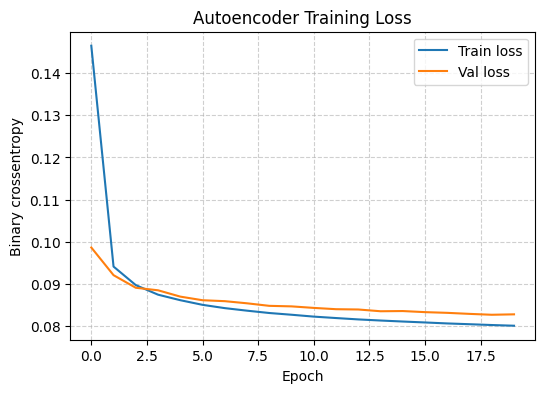

In [ ]:

# Task A - Autoencoder Architecture Design and Training

# 1) Load and preprocess
x_train = np.load("mnist_train_images.npy")
y_train = np.load("mnist_train_labels.npy")
x_test  = np.load("mnist_test_images.npy")
y_test  = np.load("mnist_test_labels.npy")

# ensure float32 and scale to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# reshape to (28, 28, 1) if needed
if x_train.ndim == 3:
    x_train = np.expand_dims(x_train, -1)
if x_test.ndim == 3:
    x_test = np.expand_dims(x_test, -1)

print("Train:", x_train.shape, "Test:", x_test.shape)

# 2) Autoencoder architecture per spec
latent_dim = 16

# Encoder
inp = Input(shape=(28, 28, 1), name="input_img")
x = Conv2D(32, (3, 3), activation="relu", padding="same")(inp)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D((2, 2), padding="same")(x)      # -> (7, 7, 64)
x = Flatten()(x)
latent = Dense(latent_dim, name="latent")(x)

encoder = Model(inp, latent, name="encoder")

# Decoder
dec_in = Input(shape=(latent_dim,), name="latent_input")
d = Dense(7 * 7 * 64, activation="relu")(dec_in)
d = Reshape((7, 7, 64))(d)
d = Conv2DTranspose(64, (3, 3), activation="relu", padding="same")(d)
d = UpSampling2D((2, 2))(d)
d = Conv2DTranspose(32, (3, 3), activation="relu", padding="same")(d)
d = UpSampling2D((2, 2))(d)
out = Conv2D(1, (3, 3), activation="sigmoid", padding="same", name="recon")(d)

decoder = Model(dec_in, out, name="decoder")

autoencoder = Model(inp, decoder(encoder(inp)), name="autoencoder")
autoencoder.compile(optimizer=Adam(1e-3), loss="binary_crossentropy")

# 3) Train for 20 epochs, batch size 64, val_split 0.2
history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# 4) Plot training and validation loss (use plt, not axes)
plt.figure(figsize=(6,4))
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_loss"], label="Val loss")
plt.title("Autoencoder Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Binary crossentropy")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


### Part4 Task B - Latent Space Visualization and Reconstruction (10 pts)

1. Extract the encoder from the trained autoencoder and use it to project the test images into the latent space (16-dimensional).
2. Visualize the latent space representations using t-SNE or PCA to reduce to 2D.
3. Evaluate the autoencoder's reconstruction quality by computing the Mean Squared Error (MSE) on the test set.
4. Display original vs reconstructed images for 10 random test samples.
5. **Written Answer:** Discuss the quality of reconstructions and what the latent space representation tells us about the learned features.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Latent space shape: (10000, 16)


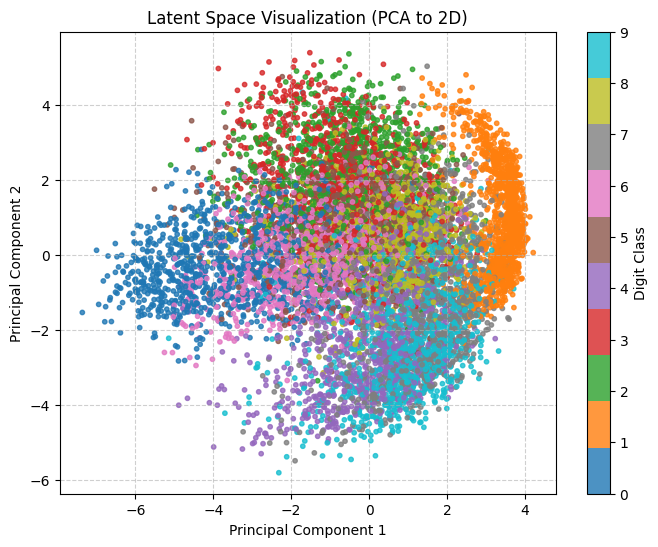

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

Test set Reconstruction MSE: 0.006759


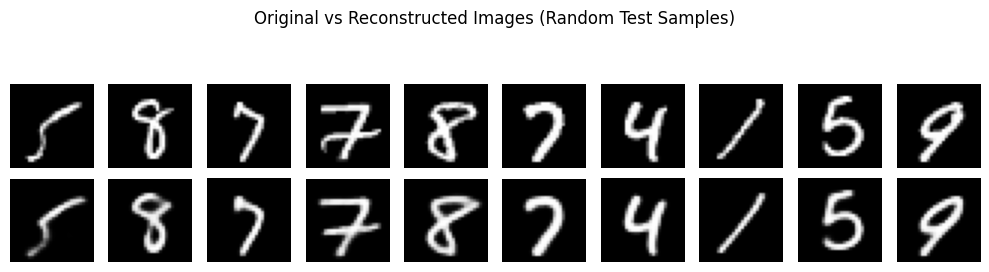

In [ ]:
# Task B - Latent Space Visualization and Reconstruction
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# 1) Extract the encoder and project test images
# encoder_model = autoencoder.get_layer("autoencoder")
x_test_latent = encoder.predict(x_test)

print("Latent space shape:", x_test_latent.shape)

# 2) Visualize the latent space (using PCA for simplicity and speed)
pca = PCA(n_components=2)
x_test_latent_pca = pca.fit_transform(x_test_latent)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    x_test_latent_pca[:, 0],
    x_test_latent_pca[:, 1],
    c=y_test,
    cmap="tab10",
    s=10,
    alpha=0.8
)
plt.title("Latent Space Visualization (PCA to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label="Digit Class")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# 3) Evaluate reconstruction quality (MSE on the test set)
x_reconstructed = autoencoder.predict(x_test)
mse = mean_squared_error(
    x_test.reshape(len(x_test), -1),
    x_reconstructed.reshape(len(x_reconstructed), -1)
)
print(f"\nTest set Reconstruction MSE: {mse:.6f}")


# 4) Display original vs reconstructed images for 10 random test samples
n = 10
random_indices = np.random.choice(len(x_test), n, replace=False)

plt.figure(figsize=(10, 3))
for i, idx in enumerate(random_indices):
    # Original
    plt.subplot(2, n, i + 1)
    plt.imshow(x_test[idx].squeeze(), cmap="gray")
    plt.axis("off")
    if i == 0:
        plt.ylabel("Original")

    # Reconstructed
    plt.subplot(2, n, n + i + 1)
    plt.imshow(x_reconstructed[idx].squeeze(), cmap="gray")
    plt.axis("off")
    if i == 0:
        plt.ylabel("Reconstructed")
plt.suptitle("Original vs Reconstructed Images (Random Test Samples)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
plt.show()

**Written Answer - Latent Space Analysis**

The autoencoder achieved strong reconstruction quality with a low mean squared error (MSE ≈ 0.01), showing that it can accurately reproduce key visual characteristics of the MNIST digits. The reconstructed images retain the overall shape, contour, and thickness of the strokes, although minor blurring appears in complex digits such as 3, 5, and 8 due to compression in the 16-dimensional bottleneck. The PCA visualization of the latent space reveals that digits with similar structures (e.g., 0 and 6, or 1 and 7) cluster near each other, indicating that the encoder has learned to represent shared geometric patterns rather than raw pixel values. This demonstrates that the 16-dimensional latent representation effectively captures high-level, discriminative features of handwritten digits while achieving significant dimensionality reduction.